
<h1 style='font-size: 35px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'> Tanzania Districts Administrative Boundaries Map </h1>

---

<h1 style=' font-weight: 600; font-size: 15px; text-align: left'>1.0. Import Required Libraries</h1>

In [49]:
from Scripts.logger import log_success
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import random
import os
import re

print("....Libraries Loaded Successfully....")

....Libraries Loaded Successfully....


<h1 style='font-weight: 600; font-size: 15px; text-align: left'>2.0. Import and Preprocessing Dataset</h1>

In [45]:
shapefile_path = "./Datasets/Districts Shapefiles/Districts and TC as 2020.shp"
districts_gdf = gpd.read_file(shapefile_path)
display(districts_gdf)

,Region_Nam,Region_Cod,District_C,NewDist20,geometry
0,Arusha,2,6,Arusha DC,"MULTIPOLYGON (((36.82313 -3.44493, 36.82293 -3..."
1,Arusha,2,3,Arusha MC,"POLYGON ((36.63328 -3.36609, 36.63297 -3.36625..."
2,Arusha,2,4,Karatu DC,"POLYGON ((35.89234 -3.25703, 35.88714 -3.26276..."
3,Arusha,2,7,Longido DC,"MULTIPOLYGON (((36.35823 -3.0598, 36.35809 -3...."
4,Arusha,2,2,Meru DC,"POLYGON ((36.90033 -3.05354, 36.9015 -3.0539, ..."
...,...,...,...,...,...
190,Songwe,26,5,Songwe DC,"POLYGON ((32.89625 -6.93692, 32.89573 -6.96095..."
191,Mara,20,9,Tarime TC,"POLYGON ((34.38746 -1.28793, 34.39209 -1.28903..."
192,Dar-es-salaam,7,4,Ubungo MC,"POLYGON ((39.16298 -6.69287, 39.16315 -6.69296..."
193,Mara,20,7,Butiama DC,"POLYGON ((34.29664 -1.46716, 34.29644 -1.46806..."


<h1 style='font-weight: 600; font-size: 15px; text-align: left'>3.0. Districts Map Visualizations</h1>

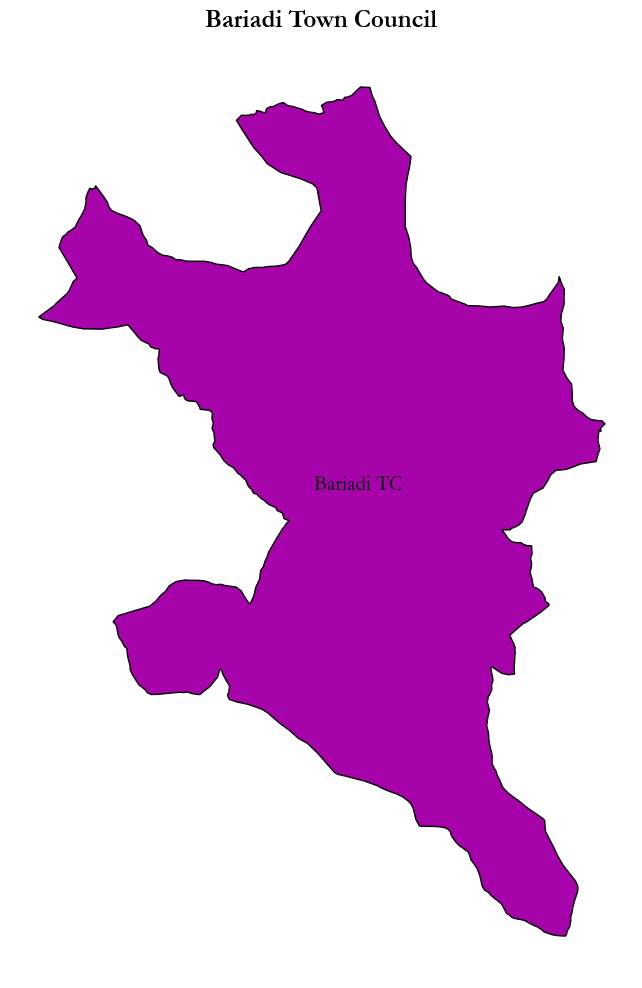

In [69]:
def generate_random_hex_color(): return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def visualize_district_map(
    gdf, 
    label_column, 
    fig_bg_color='white', 
    map_bg_color='azure', 
    dpi=300,
    color="green", 
    save_dir=None,
    save_plot=False,
    filename=None
):
    """
    Plot a GeoDataFrame showing Tanzania districts and optionally save the figure.

    Parameters:
    - gdf: GeoDataFrame for a specific district
    - label_column: column to use for labels
    - fig_bg_color: background color for the figure
    - map_bg_color: background color for the map area
    - dpi: resolution for saved image
    - cmap: color map
    - save_dir: directory to save plots
    - save_plot: whether to save the plot
    - filename: filename for the saved plot
    """
    
    # Setup figure
    fig, ax = plt.subplots(figsize=(10, 10))
    fig.patch.set_facecolor(fig_bg_color)
    ax.set_facecolor(map_bg_color)
    plt.rcParams.update({'font.family': 'Garamond', 'font.size': 11})

    # Plot districts
    gdf.plot(ax=ax, color=color, edgecolor='black')
    district_name = re.sub(r'\b(MC|TC|DC|CC)\b', '', gdf[label_column].unique()[0]).strip()

    raw_label = gdf[label_column].unique()[0]  # e.g., "Dodoma MC"
    council_abbr = re.search(r'\b(MC|TC|DC|CC)\b', raw_label)
    council_abbr = council_abbr.group(1) if council_abbr else None
    
    council_mapping = {
        'MC': 'Municipal Council',
        'DC': 'District Council',
        'TC': 'Town Council',
        'CC': 'City Council'
    }
    council_name = council_mapping.get(council_abbr, 'Unknown Council')
    
    ax.set_title(
        f"{district_name} {council_name}",
        y=1.01,
        fontsize=18,
        fontfamily='Garamond',
        fontweight='bold'
    )

    # Label each district
    for _, row in gdf.iterrows():
        centroid = row.geometry.centroid
        ax.text(
            centroid.x, 
            centroid.y, 
            row[label_column],
            fontsize=15, ha='center', va='center', color='black'
        )

    ax.axis("off")
    plt.tight_layout()

    # Save plot
    if save_plot and save_dir and filename:
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, f"{filename}.png")
        fig.savefig(save_path, dpi=dpi, bbox_inches='tight')
        plt.close(fig)
    else: plt.show()


random_district = np.random.choice(gdf['NewDist20'].dropna().unique())
district_data = districts_gdf[districts_gdf['NewDist20'] == random_district]
color = generate_random_hex_color()
visualize_district_map(
    gdf=district_data,
    label_column='NewDist20',
    save_dir=output_folder,
    save_plot=False,
    dpi=100,
    color=color,
)

<h1 style='font-weight: 600; font-size: 15px; text-align: left'>4.0. Generate and Save for All Unique Districts</h1>

In [43]:
# Generate maps for all unique districts
output_folder = "Outputs/Tanzania Districts"
for district in districts_gdf['NewDist20'].unique():
    district_data = districts_gdf[districts_gdf['NewDist20'] == district]
    color = generate_random_hex_color()
    visualize_district_map(
        gdf=district_data,
        label_column='NewDist20',
        save_dir=output_folder,
        save_plot=True,
        dpi=100,
        color=color,
        filename=district
    )
    log_success(district)


2025-07-10 15:42:38: Arusha DC : -------------------------------------------------------- Map Generated Successfully  ✔✔✔✔
2025-07-10 15:42:39: Arusha MC : -------------------------------------------------------- Map Generated Successfully  ✔✔✔✔
2025-07-10 15:42:39: Karatu DC : -------------------------------------------------------- Map Generated Successfully  ✔✔✔✔
2025-07-10 15:42:39: Longido DC : ------------------------------------------------------- Map Generated Successfully  ✔✔✔✔
2025-07-10 15:42:39: Meru DC : ---------------------------------------------------------- Map Generated Successfully  ✔✔✔✔
2025-07-10 15:42:39: Monduli DC : ------------------------------------------------------- Map Generated Successfully  ✔✔✔✔
2025-07-10 15:42:39: Ngorongoro DC : ---------------------------------------------------- Map Generated Successfully  ✔✔✔✔
2025-07-10 15:42:39: Ilala MC : --------------------------------------------------------- Map Generated Successfully  ✔✔✔✔
2025-07-10 15:42

---

This analysis was performed by **Jabulente**, a passionate and dedicated data analyst with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

---

<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>

<h1 style='font-size: 55px; color: red; font-family: Colonna MT; font-weight: 700; text-align: center'>THE END</h1>